In [1]:
!pip install lifetimes

  Running setup.py bdist_wheel for autograd: started
  Running setup.py bdist_wheel for autograd: finished with status 'done'
  Stored in directory: C:\Users\Subha\AppData\Local\pip\Cache\wheels\42\62\66\1121afe23ff96af4e452e0d15e68761e3f605952ee075ca99f
  Running setup.py bdist_wheel for dill: started
  Running setup.py bdist_wheel for dill: finished with status 'done'
  Stored in directory: C:\Users\Subha\AppData\Local\pip\Cache\wheels\59\b1\91\f02e76c732915c4015ab4010f3015469866c1eb9b14058d8e7
  Running setup.py bdist_wheel for future: started
  Running setup.py bdist_wheel for future: finished with status 'done'
  Stored in directory: C:\Users\Subha\AppData\Local\pip\Cache\wheels\8b\99\a0\81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built autograd dill future
  Found existing installation: scipy 0.19.0
    Uninstalling scipy-0.19.0:
      Successfully uninstalled scipy-0.19.0


  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd 
df = pd.read_excel('OnlineRetailDataset.xlsx')

In [1]:
import pandas as pd

In [4]:
from matplotlib import pyplot as plt
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [5]:
from lifetimes.utils import summary_data_from_transaction_data


In [37]:
summary = summary_data_from_transaction_data(df, 'CustomerID', 'InvoiceDate', observation_period_end='2011-12-30')

print(summary.head())

            frequency  recency      T
CustomerID                           
12346             0.0      0.0  346.0
12347             6.0    365.0  388.0
12348             3.0    283.0  379.0
12349             0.0      0.0   39.0
12350             0.0      0.0  331.0


In [43]:
from lifetimes import BetaGeoFitter

# similar API to scikit-learn and lifelines.
bgf = BetaGeoFitter(penalizer_coef=28)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
print(bgf)


<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 6.54, b: 0.00, r: 0.09>


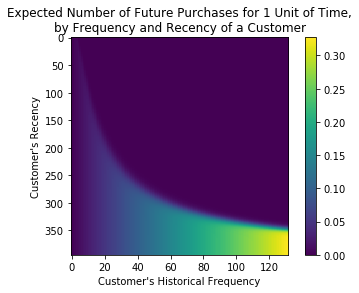

In [44]:
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(bgf)
plt.show()

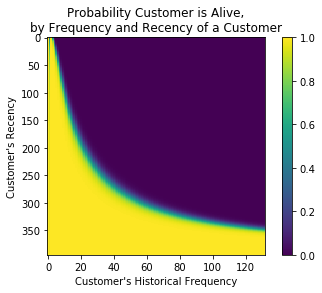

In [45]:
from lifetimes.plotting import plot_probability_alive_matrix

plot_probability_alive_matrix(bgf)
plt.show()

In [48]:
t = 5
summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'], summary['recency'], summary['T'])
summary.sort_values(by='predicted_purchases')

,frequency,recency,T,predicted_purchases
CustomerID,,,,
14237,0.0,0.0,394.0,0.001073
15922,0.0,0.0,394.0,0.001073
17908,0.0,0.0,394.0,0.001073
12791,0.0,0.0,394.0,0.001073
14142,0.0,0.0,394.0,0.001073
...,...,...,...,...
14606,88.0,372.0,394.0,1.099565
15311,89.0,373.0,394.0,1.112052
17841,111.0,372.0,394.0,1.386613
